# Overfitting, Underfitting & Hyperparameter Tuning

We've already seen how to build regression models, and briefly touched on the concepts of overfitting and underfitting. In this section, we will explore these concepts in more detail, along with hyperparameter tuning techniques to improve model performance.

## Overfitting and Underfitting

Overfitting and underfitting are common issues in machine learning models, particularly in regression tasks.

-   **Underfitting** occurs when a model is too simple to capture the underlying patterns in the data, resulting in poor performance on both training and test datasets.
-   **Overfitting** occurs when a model is too complex, capturing noise in the training data rather than the underlying pattern, leading to poor generalization to new data.

## Bias-Variance Tradeoff

The bias-variance tradeoff is a key concept in understanding overfitting and underfitting:

-   **Bias**: Error due to overly simplistic assumptions in the learning algorithm. High bias leads to underfitting.
-   **Variance**: Error due to excessive sensitivity to small fluctuations in the training set. High variance leads to overfitting.
-   **Tradeoff**: A good model balances bias and variance to minimize total error.

## Learning Curves

Learning curves are a useful tool to visualize the performance of a model as the size of the training dataset increases. They can help identify overfitting and underfitting:

-   **Underfitting**: High training and validation errors, indicating the model is too simple.
-   **Overfitting**: Low training error but high validation error, indicating the model is too complex and captures noise in the training data.

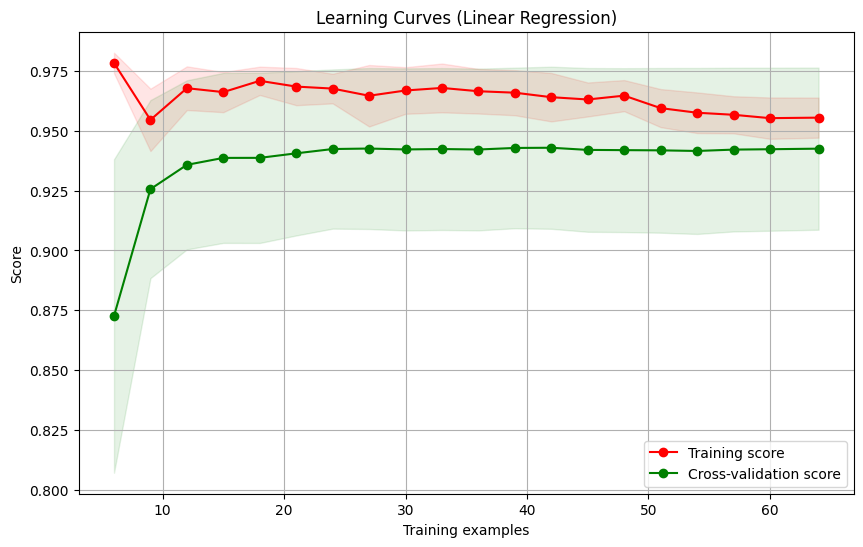

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 20),
                                                        scoring='r2')

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("Learning Curves (Linear Regression)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

## Visualizing Overfitting and Underfitting

We can visualize overfitting and underfitting using polynomial regression. A simple linear model may underfit, while a high-degree polynomial may overfit the data, trying to fit every point perfectly, but likely failing to generalize well to unseen data.

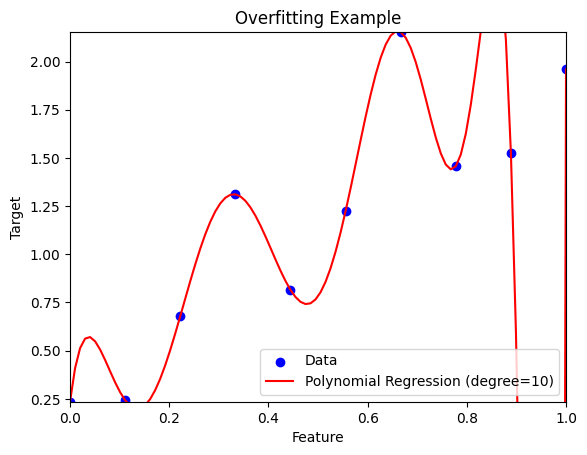

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
X = np.linspace(0, 1, 10).reshape(-1, 1)  # 10 random points in range [0, 1]
y = 2 * X + 0.3 * np.random.randn(10, 1)  # Linear relationship with noise

# Create polynomial features
poly = PolynomialFeatures(degree=20)
X_poly = poly.fit_transform(X)

# Fit linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions
X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

# Plotting
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label='Polynomial Regression (degree=10)')
plt.title('Overfitting Example')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.xlim(X.min(), X.max())
plt.ylim(y.min(), y.max())
plt.legend()
plt.show()

## Regularization Techniques

Regularization techniques are used to prevent overfitting by adding a penalty for large coefficients in the model. This encourages simpler models that generalize better to unseen data.

-   **Ridge Regression** (L2 penalty): Shrinks coefficients to prevent overfitting.
-   **Lasso Regression** (L1 penalty): Can shrink some coefficients to zero (feature selection).

## Hyperparameter Tuning

Hyperparameters are settings that are not learned from the data but are set before training the model. Tuning these hyperparameters can significantly improve model performance. Common hyperparameters include:

-   Regularization strength (e.g., `alpha` in Ridge and Lasso).
-   Degree of polynomial features.
-   Number of trees in ensemble methods (e.g., Random Forest).
-   Learning rate in gradient boosting methods.
-   Etc.

### Grid Search and Random Search

Grid search and random search are techniques for hyperparameter tuning:

-   **Grid Search**: Exhaustively searches through a specified subset of hyperparameters, evaluating model performance for each combination.
-   **Random Search**: Samples a fixed number of hyperparameter combinations from a specified distribution, often more efficient than grid search.

In [3]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso
import numpy as np

# Define hyperparameter grid for Ridge regression
params = {'alpha': np.logspace(-3, 3, 7)}

# Create a Ridge model
ridge = Ridge()

# Perform grid search
grid_search = GridSearchCV(ridge, param_grid=params, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Best parameters (Grid Search): {grid_search.best_params_['alpha']:.2f}")
print(f"Best cross-validation score (Grid Search): {grid_search.best_score_:.2f}")

# Perform random search
random_search = RandomizedSearchCV(ridge, param_distributions=params, n_iter=7,
                                   cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

print(f"Best parameters (Random Search): {random_search.best_params_['alpha']:.2f}")
print(f"Best cross-validation score (Random Search): {random_search.best_score_:.2f}")

Best parameters (Grid Search): 0.10
Best cross-validation score (Grid Search): 0.94
Best parameters (Random Search): 0.10
Best cross-validation score (Random Search): 0.94


## Hands-on Exercises

-   Generate synthetic data and visualize overfitting and underfitting using polynomial regression.

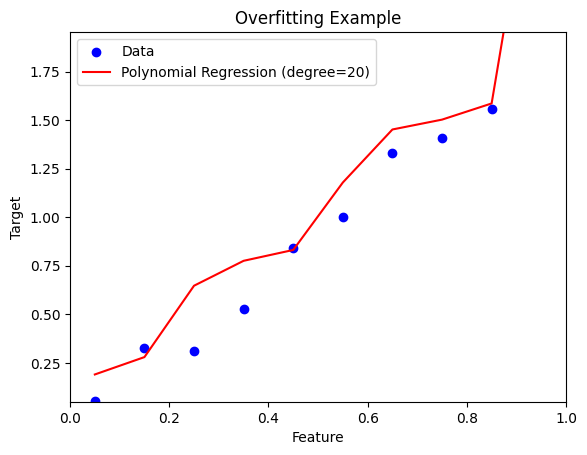

In [4]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 1, 11).reshape(-1, 1)  # 11 random points in range [0, 1]
y = 2 * X + 0.1 * np.random.randn(11, 1)  # Linear relationship with noise

# Create polynomial features
poly = PolynomialFeatures(degree=20)
X_poly = poly.fit_transform(X)

# Fit linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions
X_test = np.linspace(0.05, 0.95, 10).reshape(-1, 1)
y_test = 2 * X_test + 0.1 * np.random.randn(10, 1)
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

# Plotting
plt.scatter(X_test, y_test, color='blue', label='Data')
plt.plot(X_test_poly[:, 1], y_pred, color='red', label='Polynomial Regression (degree=20)')
plt.title('Overfitting Example')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.xlim(X.min(), X.max())
plt.ylim(y.min(), y.max())
plt.legend()
plt.show()

-   Implement regularization techniques (Ridge and Lasso) and compare their performance.

Ridge Regression Score: 0.87
Lasso Regression Score: 0.66


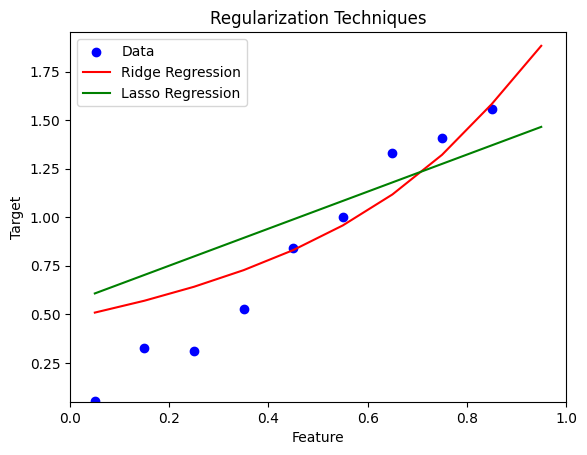

In [5]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

# Create Ridge and Lasso models
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Fit models
ridge_model.fit(X_poly, y)
lasso_model.fit(X_poly, y)

# Predict using both models
ridge_pred = ridge_model.predict(X_test_poly)
lasso_pred = lasso_model.predict(X_test_poly)

print(f"Ridge Regression Score: {r2_score(y_test, ridge_pred):.2f}")
print(f"Lasso Regression Score: {r2_score(y_test, lasso_pred):.2f}")

# Plotting
plt.scatter(X_test, y_test, color='blue', label='Data')
plt.plot(X_test_poly[:, 1], ridge_pred, color='red', label='Ridge Regression')
plt.plot(X_test_poly[:, 1], lasso_pred, color='green', label='Lasso Regression')
plt.title('Regularization Techniques')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.xlim(X.min(), X.max())
plt.ylim(y.min(), y.max())
plt.legend()
plt.show()

-   Perform hyperparameter tuning using grid search for Ridge and Lasso regression models.

In [6]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Ridge regression
ridge_params = {'alpha': np.logspace(-3, 3, 7)}

# Create a Ridge model
ridge = Ridge()

# Perform grid search
ridge_grid_search = GridSearchCV(ridge, param_grid=ridge_params, cv=5, scoring='r2')
ridge_grid_search.fit(X_poly, y)

print(f"Best parameters (Ridge Grid Search): {ridge_grid_search.best_params_['alpha']:.2f}")

# Define hyperparameter grid for Lasso regression
lasso_params = {'alpha': np.logspace(-3, 3, 7)}

# Create a Lasso model
lasso = Lasso()

# Perform grid search
lasso_grid_search = GridSearchCV(lasso, param_grid=lasso_params, cv=5, scoring='r2')
lasso_grid_search.fit(X_poly, y)

print(f"Best parameters (Lasso Grid Search): {lasso_grid_search.best_params_['alpha']:.2f}")

Best parameters (Ridge Grid Search): 0.10
Best parameters (Lasso Grid Search): 0.01


-   Visualize the performance of the tuned models on the test set.

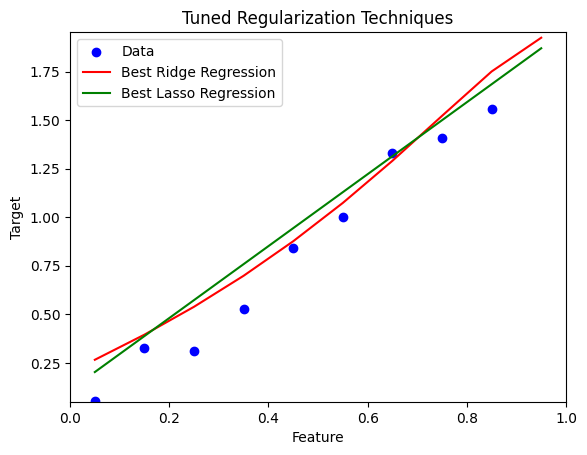

Best Ridge Regression Score: 0.94
Best Lasso Regression Score: 0.94


In [7]:
# Predict using the best Ridge model
best_ridge_model = ridge_grid_search.best_estimator_
ridge_test_pred = best_ridge_model.predict(X_test_poly)

# Predict using the best Lasso model
best_lasso_model = lasso_grid_search.best_estimator_
lasso_test_pred = best_lasso_model.predict(X_test_poly)

# Plotting
plt.scatter(X_test, y_test, color='blue', label='Data')
plt.plot(X_test, ridge_test_pred, color='red', label='Best Ridge Regression')
plt.plot(X_test, lasso_test_pred, color='green', label='Best Lasso Regression')
plt.title('Tuned Regularization Techniques')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.xlim(X.min(), X.max())
plt.ylim(y.min(), y.max())
plt.legend()
plt.show()

# Score the tuned models
print(f"Best Ridge Regression Score: {r2_score(y_test, ridge_test_pred):.2f}")
print(f"Best Lasso Regression Score: {r2_score(y_test, lasso_test_pred):.2f}")